# Unsupervised Machine Learning 

**Two categories of machine learning：supervised and unsupervised learning**

- Unsupervised learning: models that identify structure in unlabeled data. (We only have x. We want to find the structure in x.)
    - Clustering: models that detect and identify distinct groups in the data, **(such as KMeans clustering)**                                                                                                                                                   
    - Dimensionality reduction: models that detect and identify lower-dimensional structure in higher-dimensional data. **(such as PCA)** 
    
## what is unsupervised ML 

Unsupervised ML is the training of machine using information that is neither classified nor labeled and allowing the algorithm to act on the information without guidance:  interference with learning with only the input vectors, group the database on similarity, or discover underlying patterns. 



## Compare with Supervised ML
In Supervised ML, you teach the computer what you want to get from the dataset; in unsupervised ML, you are learning from the computer what you can get from the dataset. 


- less restriction of the data set size 

- generate more intelligible and interpretable results 

- can be more suitable for research that is focused on induction and inferences 



# K-Means Clustering 
K-Means Clustering is one of the simplest and popular unsupervised machine learning algorithm that does clustering. It is a method of vector quantization, and originally from signal processing and data compressing. 
It divide the data into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid) 


- What is **clustering**: Clustering is a method to group your data based on similarity. It is one of the most common ways to do exploratory analysis to help users obtain insights into the structure of the data. 

- Review what is the **dimensionality of the data**: simply put, in a normal dataframe, each columen, or each feature, or each fingerprint can be seen as one dimension of the data. If all of these features are numerical data, it can create an high dimentional **Euclidean space**, 

- What is the **Euclidean distance**:  the distance between two points in any dimensiona **Euclidean space**.  

    - One dimension
    $d(p,q)=\lvert (p-q) \rvert$ 
    - Two dimension
    $$d(p,q)=\sqrt{(p_1-q_1)^2+(p_2-q_2)^2}$$
    - Higher dimension
    $$d(p,q)=\sqrt{(p_1-q_1)^2+(p_2-q_2)^2+....+(p_i-q_i)^2+...+(p_n-q_n)^2}$$



- What is **Centroid**:  it is the arithmetic mean position of all the points in the figures. For an object with homogenous composition, it is the center of mass. 

    The centroid of a finite set of m points $X_1, X_2, ...., X_m$ in $\mathbb{R}^n$ is

    $$C= \frac{X_1+X_2+....+X_m}{m}$$ 
    Each of the X is a high dimension factor.
    This point minimizes the sum of squared Euclidean distances between itself and each point in the set. 

## How does K-Means algorithm work:
It is an iterative process: 

1. Specify number of clusters K
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points as the centroids, $C_1$, $C_2$,...$C_k$ 
3. Calculate all data points's Euclidean distances to each centroids, and assign the data points to their cloest centroid's cluster
4. Based on the Euclidean position of each data points in each cluster, recalculate each cluster's centroid by taking the average of the all data points that belong to it. 
5. Keep iterating step 3 and step 4 until there is no change to the centroids, i.e. assignement of data points to clusters isn't changing 

<img src ="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width=500>

## Hyperparameter of K-Means methods from Scikit's KMeans:
    


### n_clusters
Number of the clusters you want. This is almost empirical, however, there are a few methods to evaluate which is the best **n_clusters** to choose 

### init
Where you can set the intial cluster centroids. "random" is commonly used. init="random", other smarter choice is K-Means++


### normalizing the data 
**You need to normalize your data for KMeans**
In fact, most of unsupervised ML, if it involves Euclidean Space, it requires normalization of the data so that all feastures are within the same range.  
You can use **StandardScaler()** class's **fit_transform()** function, which rescale your data with mean of 0 and variance of 1. 

### Random_state

Setting a random seed, it is useful if we want to reproduce exact clusters over and over again. 

# Let's try to do an example using the periodic table dataset 
## First step: Always import the necessary libraries

In [1]:
!pip install kneed #starting from this week, we have more packages that need to be installed manually into JupyterLab
import numpy as np
import pandas as pd
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

## Read the periodic table 

In [2]:
url = 'https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv'
df = pd.read_csv(url)
print(df.head())
print(df.columns)

   AtomicNumber    Element Symbol  AtomicMass  NumberofNeutrons  \
0             1   Hydrogen      H       1.007                 0   
1             2     Helium     He       4.002                 2   
2             3    Lithium     Li       6.941                 4   
3             4  Beryllium     Be       9.012                 5   
4             5      Boron      B      10.811                 6   

   NumberofProtons  NumberofElectrons  Period  Group  Phase  ...  \
0                1                  1       1    1.0    gas  ...   
1                2                  2       1   18.0    gas  ...   
2                3                  3       2    1.0  solid  ...   
3                4                  4       2    2.0  solid  ...   
4                5                  5       2   13.0  solid  ...   

  FirstIonization   Density MeltingPoint BoilingPoint NumberOfIsotopes  \
0         13.5984  0.000090       14.175        20.28              3.0   
1         24.5874  0.000179          NaN

# Prepare the dataset for K-Means Clustering:
- All input data should be numerical
- cannot include NA, or NAN type of input 
- Need to rescale, or normalize the input 

In [4]:
# Here are some features of interest, and we'll use "Type" as a target for visualization (all numerical data from the set) 
features = ['AtomicMass', 'NumberofNeutrons', 'NumberofProtons', 'NumberofElectrons','Electronegativity','FirstIonization','Density','MeltingPoint','BoilingPoint']
# for K-means, we don't have a target. this target=['Type'] is to validate the result, we don't need to change it to numerical value.
target = ['Type'] #We set this as target because we want to know if the numercial properties of elements will be enough to classify the elements into its category. 
fandt = np.concatenate((features,target),axis=0)

# New dataframe with just the columns of interest
# [all datasets, just columns]
df2 = df.loc[:, fandt]

# We'll focus on elements whose atomic number is less than 89, because higher than 89, many of the elements missing data for the features we uses. 
cleaned_up = df2.drop(df[df['AtomicNumber'] >= 89].index, inplace = False) 

# Also remove He since it doesn't have a melting point
cleaned_up.drop(df[df['AtomicNumber'] == 2].index, inplace = True) 

# Since noble gases are stable, Noble Gases have an electronegativity of "NaN". for conveniency, we replace the "NaN" values by 0s.
cleaned_up.fillna( value={'Electronegativity':0} ,inplace=True)

cleaned_up = cleaned_up.reset_index(0)
cleaned_up.head()

,index,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,Type
0,0,1.007,0,1,1,2.20,13.5984,0.00009,14.175,20.28,Nonmetal
1,2,6.941,4,3,3,0.98,5.3917,0.53400,453.850,1615.00,Alkali Metal
2,3,9.012,5,4,4,1.57,9.3227,1.85000,1560.150,2742.00,Alkaline Earth Metal
3,4,10.811,6,5,5,2.04,8.2980,2.34000,2573.150,4200.00,Metalloid
4,5,12.011,6,6,6,2.55,11.2603,2.27000,3948.150,4300.00,Nonmetal


In [5]:
# Now let's assign our X and Y 
X = cleaned_up.loc[:,features]
Y = cleaned_up.loc[:,target] #even in K-Means, we cannot use the Y as input, which is categorical data, we will use this to evaluate our results. 

# Shape of our input data
print(X.shape)

# List of unique target values
print(cleaned_up.Type.unique())

(87, 9)
['Nonmetal' 'Alkali Metal' 'Alkaline Earth Metal' 'Metalloid' 'Halogen'
 'Noble Gas' 'Metal' 'Transition Metal' 'Lanthanide' 'Actinide']


## Normalize your feature data so that no feature has a weight imbalance compared to other features

In [6]:
from sklearn.preprocessing import StandardScaler
# StandardScaler is one class inside of sklearn
scaler = StandardScaler()
# the function we called is fit_transform(), we don't use Y here since we don't need it in this K-means clustering
scaled_features = scaler.fit_transform(X.values) #this will scale the data for each feature that the means are 0, and variances are 1. 

In [7]:
## Set the parameters for KMeans clustering and perform clustering
n_clusters = 7  # 7 periodic group
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# init = "random", you assign the centroid randomly; n_init = 10 to avoid your randomness get into local minimum instead of globle minimum;
# max_iter, the maximum number of iterations to avoid nonconverged situation. 
#random_state: to make sure you can reproduce your results running multiple times, typically, in real research, you like to use true random instead of a random seed. 



clusterer = KMeans(n_clusters,**kmeans_kwargs)
clusterer.fit(scaled_features)

KMeans(init='random', n_clusters=7, random_state=42)

## Let's take a look at the statistics of the results 
Definition: SSE, Sum of squared error, the sum of the squared of the difference between each datapoints to its centroid.  


In [8]:
# The lowest SSE value
print('SSE value: ', clusterer.inertia_)
print()

# Final locations of the centroid
print('Centroids locations: \n',clusterer.cluster_centers_)
print()

# The number of iterations required to converge
print('Num iterations for convergence: ', clusterer.n_iter_)
print()

SSE value:  191.3492612401101

Centroids locations: 
 [[ 0.70290483  0.69307966  0.71664786  0.71664786 -0.69447514 -0.8048745
   0.04487803  0.09077233  0.25987992]
 [ 1.60989512  1.64478413  1.55220347  1.55220347 -0.11103616 -0.13719657
   0.17141403 -0.80794538 -0.75419643]
 [ 1.23356041  1.24205015  1.21400239  1.21400239  0.50135208  0.03898537
   2.31850871  1.61092311  1.57148692]
 [-1.3341339  -1.3080182  -1.37721471 -1.37721471  1.22118662  2.05583251
  -1.16658629 -1.1980329  -1.39962547]
 [-0.08435301 -0.10142283 -0.05463424 -0.05463424  0.38469854  0.29151513
  -0.15250982 -0.70737069 -0.65622215]
 [-0.64124523 -0.6577463  -0.61152557 -0.61152557  0.24144497 -0.18303187
   0.07835094  0.89071974  0.80277998]
 [-1.00646465 -0.99331801 -1.02680584 -1.02680584 -1.004212   -0.16244861
  -1.01670677 -0.64400349 -0.66659762]]

Num iterations for convergence:  7



## You can also take a look at the assignments of your data to the cluster

In [9]:
# First 5 label assignments
clusterer.labels_[:5]

array([3, 6, 6, 5, 5], dtype=int32)

## Evaluating K-Means Clustering 
The most important hyper-parameter of KMeans is the number of the clusters. The choice of this number is empirical, but here are methods to help us make the decision. And Sklearn has already have build-in functions to do that. 

### 1. Elbow method: try various values of k. Plot the SSE, see where the elbow is. 

In [10]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 31):
    clusterer = KMeans(n_clusters=k, **kmeans_kwargs)
    clusterer.fit(scaled_features)
    sse.append(clusterer.inertia_)  # SSEnumber


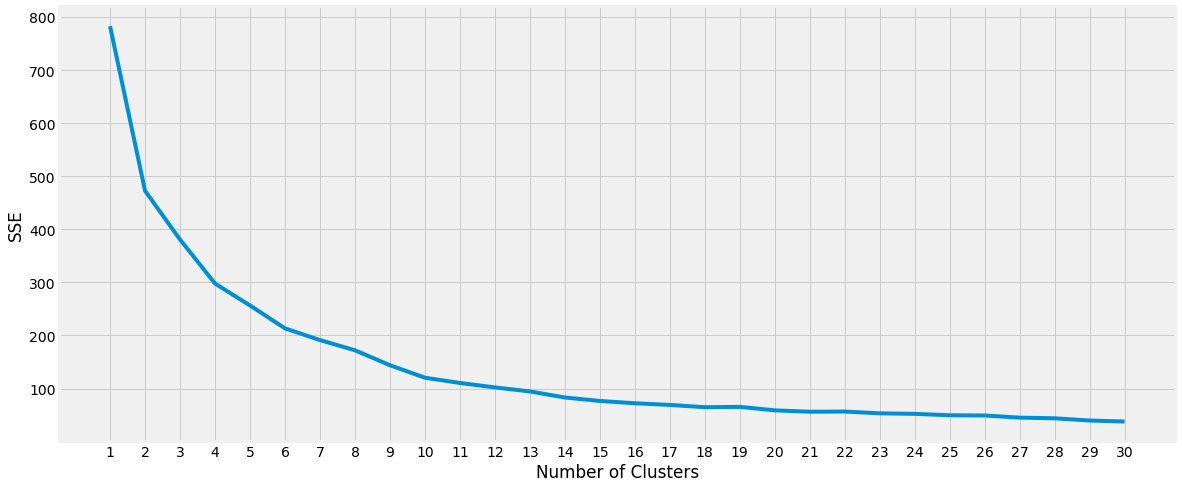

In [11]:
plt.figure(figsize=(20,8))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 31), sse)
plt.xticks(range(1, 31))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [12]:
## Find the elbow point
# Call the function KneeLocator(), which helps you fond the knee of this curve
kl = KneeLocator(
    range(1, 31), sse, curve="convex", direction="decreasing"
)

# Smaller than the knee number -> not enough clusters
# higher -> too much
# Find the cluster that best represents the property of your dataset, and as small as possible
print("Optimal number of clusters based on elbow method: ", kl.elbow)

Optimal number of clusters based on elbow method:  9


### 2. Silhouette method

Silhouette refers to a method of interpretation and validation of consistency within clusters of data.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.


In [13]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 31):
    clusterer = KMeans(n_clusters=k, **kmeans_kwargs)
    clusterer.fit(scaled_features)
    score = silhouette_score(scaled_features, clusterer.labels_)
    silhouette_coefficients.append(score)

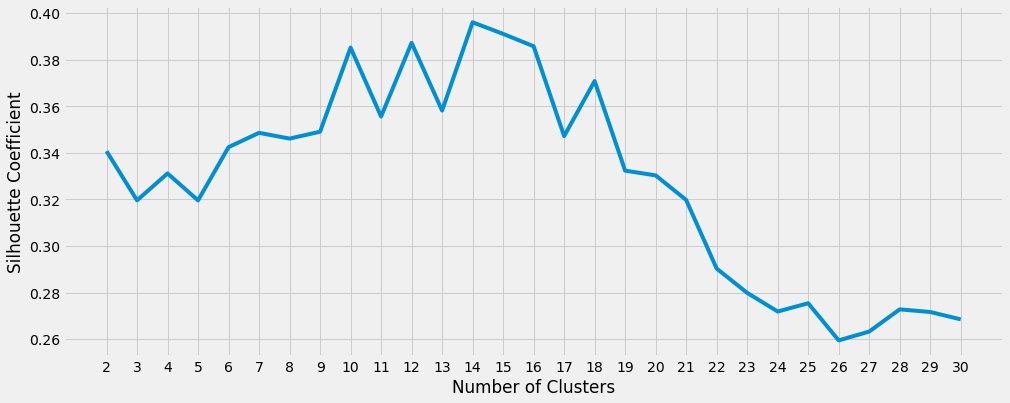

In [14]:
plt.figure(figsize=(15,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 31), silhouette_coefficients)
plt.xticks(range(2, 31))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters = 7 The average silhouette_score is : 0.3486060610035576


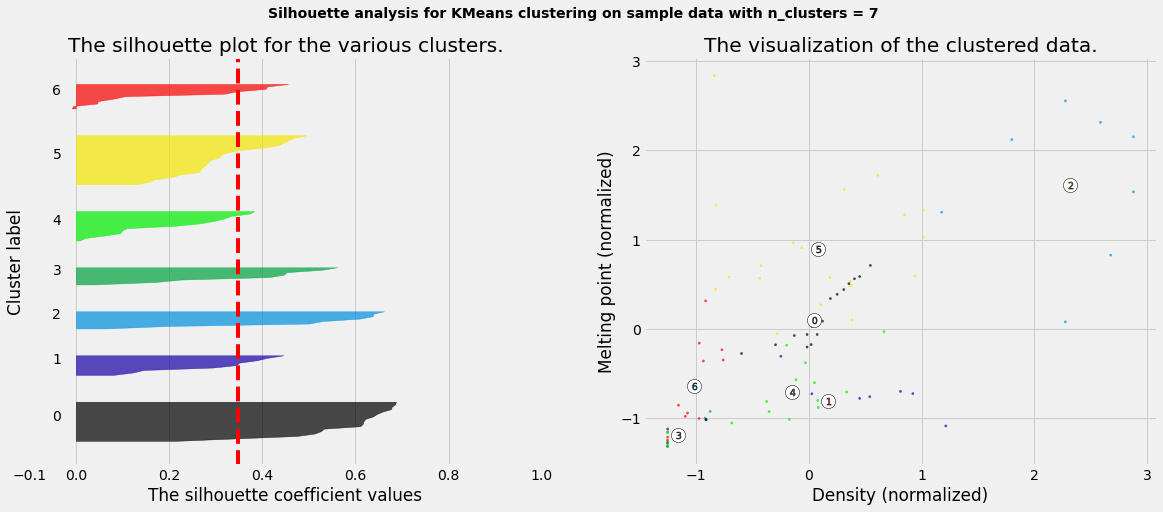

In [16]:
# let's take a look at what silhouette analysis looks like:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = scaled_features
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters , **kmeans_kwargs)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_
score = silhouette_score(scaled_features, cluster_labels)


# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(scaled_features) + (n_clusters + 1) * 10])


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print("For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)

y_lower = 10
    
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1,0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 6], X[:, 7], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 6], centers[:, 7], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[6], c[7], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Density (normalized)")
ax2.set_ylabel("Melting point (normalized)")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
           "with n_clusters = %d" % n_clusters),
           fontsize=14, fontweight='bold')

plt.show()

In [17]:
# show the result but also tell the label(number of label)
label_df = pd.DataFrame(cluster_labels,columns=['kmeans_cluster_label'])
result = pd.concat([cleaned_up,label_df],axis=1)
result.to_csv('kmeans_result.csv',index=False)

# PCA 
Another major branch of unsupervised ML is dimensionality reduction. and the most common one is principal component analysis(PCA)

**PCA** is a technique for feature extraction --- so it combines our input varibles in a specific way, then, when the "least important" variables are dropped, you are able to reduce the dimension of your data while still retaining the most valuable parts of all the variables.

- Each of the "new" variables after PCA are all independent of one another (orthogonal to each other) 
- If your PCA can fit your dataset well into the first 2 or 3 principal components, you can effectively visualize your data
- Sometimes you may do PCA to reduce the dimensionality of your data then apply another clustering or regression method

## How PCA achieves dimensionality reduction:
One of the best analogies I like about PCA: (source:https://www.youtube.com/watch?v=g-Hb26agBFg&feature=emb_logo&ab_channel=LuisSerrano) 
<table><tr>
<td><img src="TakePhoto01.png"></td>
<td><img src="TakePhoto02.png"></td>
<td><img src="TakePhoto03.png"></td>
</tr></table>

PCA is a to find the best way take a "image" of your data, and change your data from higher dimension to lower dimension illustration. 

## Algorithm 

<img src="http://alexhwilliams.info/itsneuronalblog/img/pca/projection_intuition.png" width=500>
The goal is to maximize the variance, or minimize the sum of the residual error squared (remaining variance). 

<img src="https://builtin.com/sites/default/files/inline-images/Principal%20Component%20Analysis%20second%20principal.gif" width=500>

After you achieve the principle component, you project your data into the remaining space (hyer-plane, orthogonal to your principal component), which give you an n-1 dataset, and then you repeat this process. 


There are many good online resources for PCA, for better understanding of PCA and how this algorithm works, you can also go to: https://setosa.io/ev/principal-component-analysis/. 


## PCA implementation
- PCA can become expensive to calculate, especially as the data set size grows. Some other methods can be more effective in big data set, such as SOM. 
- Implementation is easy, sklearn PCA is well documentated and supported. 
- Implementation tips:
    - even there are many more methods to choose from, a lot of data analysis can start with PCA to get more intuitive insights:Use it as guide and as an exploratory tool 
    - step by step and don't heistate to start with a subset 
    - constantly interrogate the results and ask if they make sense! WARNING, You don't have "test set error" to fall back on
- PCA can also be combined with other methods to acquire more thorough understanding of data. 
- Python also provide inverse transformation for both PCA and normalization




## Example of PCA used on periodic table data set 
### We start with Normalization of the data set to eliminate the unbalanced weight of certain feature

In [18]:
X = cleaned_up.loc[:,features]
Y = cleaned_up.loc[:,target]

In [19]:
# Standardizing the features
x = StandardScaler().fit_transform(X.values)

### Use PCA to project to 2 dimensions

In [21]:
from sklearn.decomposition import PCA
# first of all, define how many PCAs you want to do.
pca = PCA(n_components=3) #even we try to do 2 dimension PCA, we still like to see if we do 3, will the first two PCs' contribution are dominant.  
principalComponents = pca.fit_transform(x)  # this is the single one line to do PCA
principalDf = pd.DataFrame(data = principalComponents  # notice: 'data = principalComponents' are PCA datasets
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [22]:
finalDf = pd.concat([principalDf[['principal component 1', 'principal component 2', 'principal component 3']], Y], axis = 1)
finalDf.shape

(87, 4)

In [23]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,Type
0,4.375382,0.624719,1.086730,Nonmetal
1,3.172607,-0.114669,-1.807159,Alkali Metal
2,2.963907,-1.265491,-0.596160,Alkaline Earth Metal
3,2.408370,-2.604906,-0.510505,Metalloid
4,2.324838,-3.509294,0.445976,Nonmetal


### Visualization of 2D Projection 

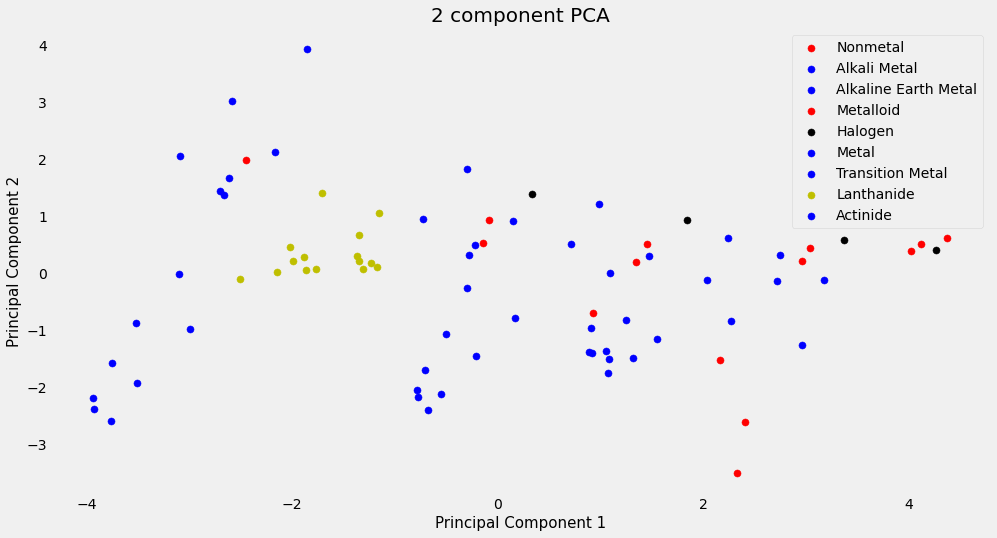

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = cleaned_up.Type.unique().tolist()
targets = ['Nonmetal', 'Alkali Metal', 'Alkaline Earth Metal', 'Metalloid', 'Halogen', 'Metal', 'Transition Metal', 'Lanthanide', 'Actinide' ]
colors =  ['r'       , 'b'           , 'b'                   , 'r'        , 'k'      , 'b'    , 'b'               , 'y'          , 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Show the explained variance, which indicates how much information is attributed to each component in the PCA

In [25]:
#check how much information is preserved by the PCA 
print(pca.explained_variance_ratio_)  # give percentage of the information that contained in the each component.
print(pca.explained_variance_ratio_.sum())  

[0.54601391 0.22996847 0.13658363]
0.912566017112511


### Since the third component has significant contribution, let's take a look at it in 3D 

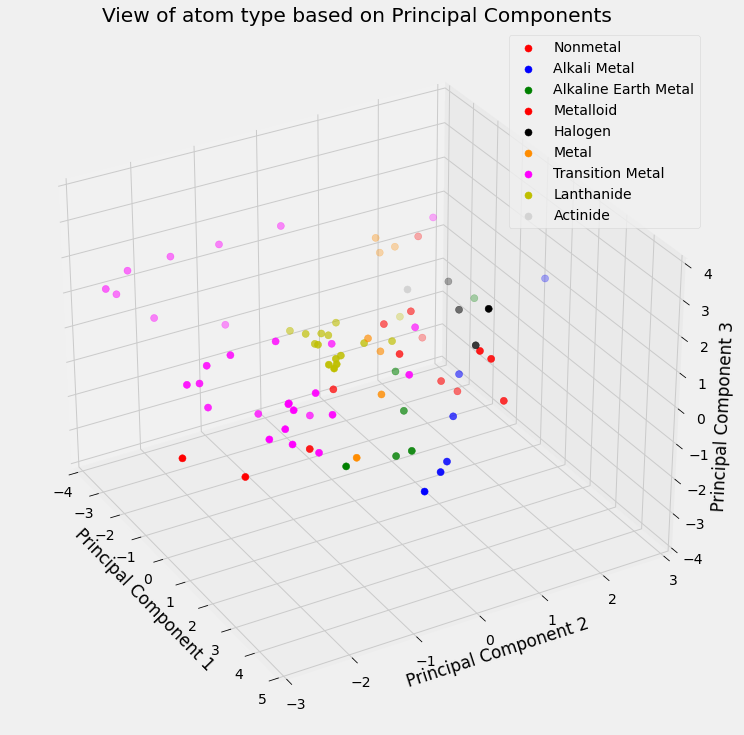

In [26]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d',zlim = [-4,4],ylim = [-3,3],xlim= [-4,5])

targets = ['Nonmetal', 'Alkali Metal', 'Alkaline Earth Metal', 'Metalloid', 'Halogen', 'Metal',       'Transition Metal', 'Lanthanide', 'Actinide' ]
colors =  ['r'       , 'b'           , 'g'                   , 'r'        , 'k'      , 'darkorange' , 'magenta'         , 'y'         , 'lightgrey']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    PT = ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1'],
                      finalDf.loc[indicesToKeep, 'principal component 2'],
                      finalDf.loc[indicesToKeep, 'principal component 3'],
                      c = color,
                      s=50
                     )
ax.view_init(30,-30)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('View of atom type based on Principal Components')
ax.legend(targets)
